In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 13452
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.lymodel1 import *
from utils.train import *
from typing import *
from collections import Counter
from utils.load_yelp import *
from utils.dataset import *
from utils.train import *

In [2]:
config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': False,
 'text_hidden_size': 100,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 4,
 'fusion_hidden_size': 200,
 'funsion_layers': 1,
 'dropout': 0.5,
 'output_size': 5,
 'bias_init': 1.0}

In [3]:
config["dropout"] = 0.1

In [4]:
train_set, valid_set, test_set= load_glove_data(config)

In [5]:
%%time
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)

CPU times: user 66 µs, sys: 7 µs, total: 73 µs
Wall time: 75.8 µs


In [6]:
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
get_parameter_number(model), loss

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


({'Total': 5459605, 'Trainable': 5459605}, CrossEntropyLoss())

In [7]:
# X, y = next(iter(valid_loader))

In [8]:
# %load_ext line_profiler

In [9]:
# %lprun -f model.forward res = model.forward(to_cuda(X))

In [10]:
# viz = get_Visdom()
# lr = 1e-3
# epoches = 20
# optimizer = get_regal_optimizer(model, optim.AdamW, lr)
# k_batch_train_visdom(model, optimizer, loss, valid_loader, viz, 30, 5)

In [11]:
%%time
y_true, y_pred, _loss = predict(model, valid_loader, loss)
evalute(y_true, y_pred), Counter(y_pred)

CPU times: user 3.85 s, sys: 2.07 s, total: 5.91 s
Wall time: 9.45 s


((0.2002257336343115, 0.066804673964128), Counter({1: 4430}))

In [12]:
viz = get_Visdom()
_interval = 5
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []


Setting up a new session...


In [13]:
%%time
lr = 1e-3
epoches = 20
optimizer = get_regal_optimizer(model, optim.AdamW, lr)
res, model = train_visdom(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer,
                         _interval=_interval)

No 1 epoch:: 554it [01:45,  5.24it/s]


No 1 epoch: train_loss:1.4918290285250921 train_acc:0.30579771476936096 valid_loss:1.3200118731698924 valid_acc:0.38803611738148985


No 2 epoch:: 554it [01:46,  5.22it/s]


No 2 epoch: train_loss:1.1348531112665516 train_acc:0.4844971081957963 valid_loss:1.0416443293035433 valid_acc:0.5302483069977426


No 3 epoch:: 554it [01:46,  5.19it/s]


No 3 epoch: train_loss:0.9979233196212536 train_acc:0.5527719001269572 valid_loss:0.9799054526313972 valid_acc:0.5609480812641083


No 4 epoch:: 554it [01:47,  5.16it/s]


No 4 epoch: train_loss:0.903261760653688 train_acc:0.60694033008887 valid_loss:0.9966119247688396 valid_acc:0.5641083521444695


No 5 epoch:: 554it [01:46,  5.18it/s]


No 5 epoch: train_loss:0.8201096186820838 train_acc:0.65253209197348 valid_loss:1.001350818261605 valid_acc:0.5787810383747178


No 6 epoch:: 554it [01:45,  5.23it/s]


No 6 epoch: train_loss:0.7393626040187469 train_acc:0.6975031739314431 valid_loss:1.0874602928656756 valid_acc:0.5530474040632054


No 7 epoch:: 554it [01:47,  5.18it/s]


No 7 epoch: train_loss:0.6589334877678463 train_acc:0.7415714487233742 valid_loss:1.229794769900647 valid_acc:0.5514672686230249


No 8 epoch:: 554it [01:47,  5.16it/s]


No 8 epoch: train_loss:0.5937760109439995 train_acc:0.7759345464804627 valid_loss:1.265799585152964 valid_acc:0.5455981941309255


No 9 epoch:: 554it [01:46,  5.19it/s]


No 9 epoch: train_loss:0.5308572740871961 train_acc:0.8027930596699111 valid_loss:1.4034728695522851 valid_acc:0.5399548532731377


No 10 epoch:: 554it [01:47,  5.14it/s]


No 10 epoch: train_loss:0.478591545478365 train_acc:0.8291155311045282 valid_loss:1.4345131706168905 valid_acc:0.5352144469525959
CPU times: user 13min 50s, sys: 4min 8s, total: 17min 59s
Wall time: 19min 27s


In [14]:
res

{'max_acc': 0.5787810383747178,
 'max_acc_epoch': 5,
 'max_train_acc': 0.65253209197348,
 'max_acc_train_loss': 0.8201096186820838,
 'max_acc_valid_loss': 1.001350818261605,
 'last_acc': 0.5352144469525959,
 'last_train_acc': 0.8291155311045282,
 'last_epoch': 10,
 'last_train_loss': 0.478591545478365,
 'last_valid_loss': 1.4345131706168905}

In [15]:
%%time
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


CPU times: user 4.01 s, sys: 2.07 s, total: 6.09 s
Wall time: 12.6 s


((0.563431151241535, 0.5607219211992461), 1.0116573503808566)

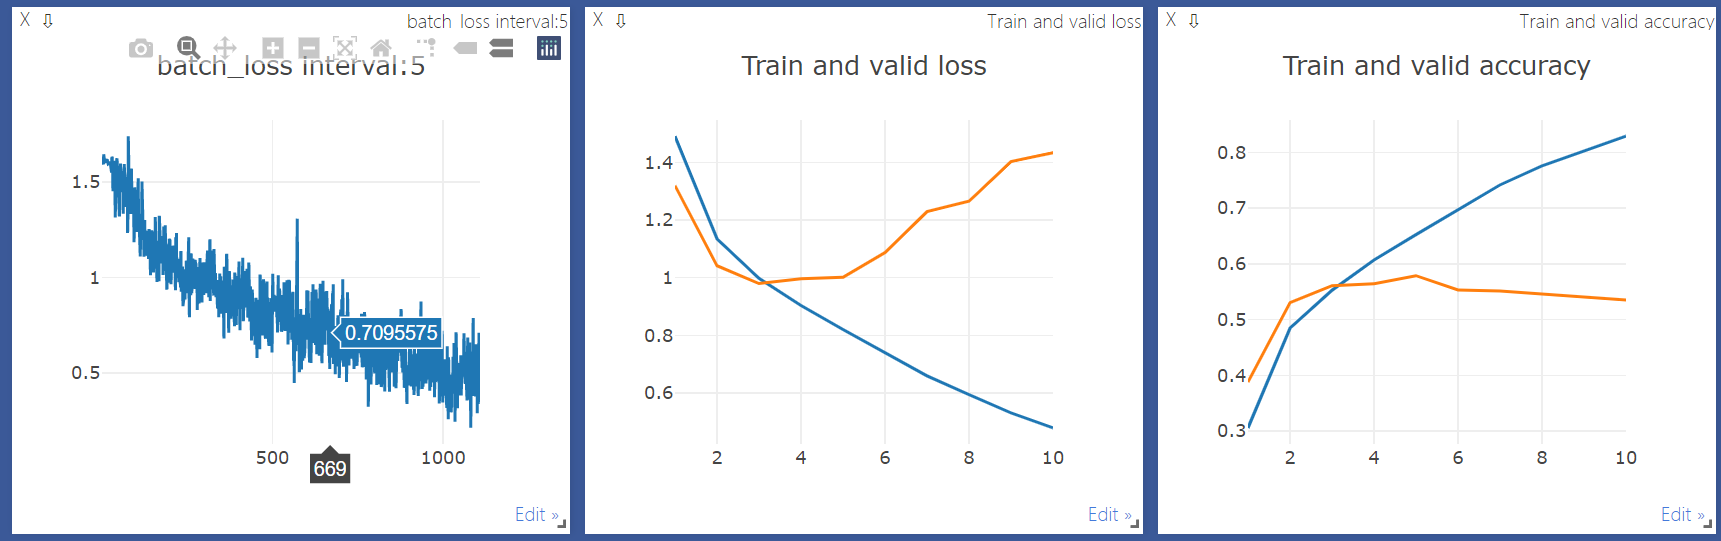